In [1]:
import os, cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/세미(2) 프로젝트/2.데이터

/content/drive/.shortcut-targets-by-id/1iZJ97_6lEv6dD796nV-fw4WzH5bf62Jz/세미(2) 프로젝트/2.데이터


### 1.센터링과 resize비교

In [5]:
# 센터링
def center_image(img, src_format = 'OpenCV', dst_format = 'OpenCV'):
    if src_format == 'OpenCV':
        h, w = img.shape[:-1]
    else: # pillow
        h, w = np.array(img).shape[:-1]

    img_size = 128
    if h > w:
        height, width = (h * img_size)//w , img_size
    else:
        width, height = (w * img_size)//h , img_size
    
    inter = cv2.INTER_AREA if h + w > 300 else cv2.INTER_CUBIC
    new_img = cv2.resize(img, dsize = (width, height), interpolation = inter)

    diff = abs(width - height) // 2
    if h > w:
        final_img = new_img[diff : diff + img_size, :]
    else:
        final_img = new_img[:, diff : diff + img_size]

    return final_img if dst_format == 'OpenCV' else Image.fromarray(final_img)

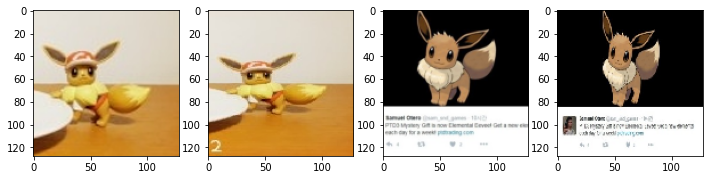

In [6]:
plt.figure(figsize = (12, 3))
plt.subplot(1, 4, 1)
img = cv2.imread('./' + 'evee' + '/' + 'evee (9).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(center_image(img));

plt.subplot(1, 4, 2)
img4 = cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_NEAREST)
plt.imshow(img4)

plt.subplot(1, 4,3)
img2 = cv2.imread('./' + 'evee' + '/' + 'evee (286).jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(center_image(img2));

plt.subplot(1, 4, 4)
img3 = cv2.resize(img2, dsize=(128, 128), interpolation= cv2.INTER_NEAREST)
plt.imshow(img3);

#########
# resize, cv2.INTER_LINEAR 사용으로 결정

### 2.interpolation 방식 비교

Text(0.5, 1.0, 'INTER_LANCZOS4')

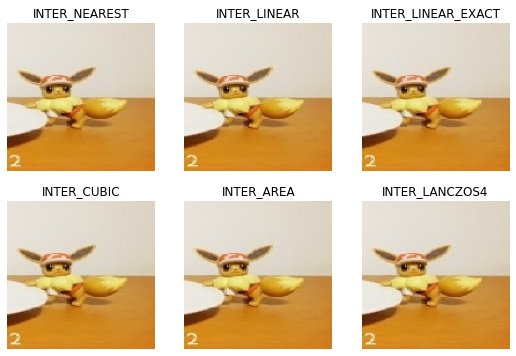

In [4]:
img = cv2.imread('./' + 'evee' + '/' + 'evee (9).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 6))
plt.subplot(2, 3, 1)
img = cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_NEAREST)
plt.imshow(img)
plt.axis('off')
plt.title('INTER_NEAREST')

plt.subplot(2, 3, 2)
img = cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_LINEAR)
plt.imshow(img)
plt.axis('off')
plt.title('INTER_LINEAR')

plt.subplot(2, 3, 3)
img = cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_LINEAR_EXACT)
plt.imshow(img)
plt.axis('off')
plt.title('INTER_LINEAR_EXACT')

plt.subplot(2, 3, 4)
img = cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_CUBIC)
plt.imshow(img)
plt.axis('off')
plt.title('INTER_CUBIC')

plt.subplot(2, 3, 5)
img = cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_AREA)
plt.imshow(img)
plt.axis('off')
plt.title('INTER_AREA')

plt.subplot(2, 3, 6)
img = cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_LANCZOS4)
plt.imshow(img)
plt.axis('off')
plt.title('INTER_LANCZOS4')